## Exploratory Data Analysis (EDA) - CO₂ Emission per Capita in ASEAN Countries

Data Sources: Global Carbon Budget (2024)Population based on various sources (2024) – with major processing by Our World in Data

### Goal 
1. Understand how emissions have evolved over time
2. Identify which countries contribute most per capita 
3. Observe regional disparities that may reflect economic growth and energy transition progress.

By visualizing trends and summarizing data patterns, we aim to extract insights that can support discussions around sustainable development and decarbonization policies in Southeast Asia.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
sns.set_theme(style="whitegrid", palette="viridis")
plt.rcParams['figure.figsize'] = (10, 5)

# Load dataset
df = pd.read_csv('co2_emission_asean_clean.csv')

df.head()

,country,year,co2_per_capita
0,Cambodia,1955,0.020978
1,Cambodia,1956,0.026384
2,Cambodia,1957,0.031546
3,Cambodia,1958,0.037897
4,Cambodia,1959,0.039849


### Dataset Overview and Basic Statistics

Before visualizing, it’s crucial to understand the dataset’s overall structure - including data types, completeness, and distribution of observations.

In [4]:
# Basic info
df.info()
print("\nShape:", df.shape)

# Summary Statistics
df.describe()

# Unique Countries
print("\nCountries in dataset:", df['country'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         912 non-null    object 
 1   year            912 non-null    int64  
 2   co2_per_capita  912 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 21.5+ KB

Shape: (912, 3)

Countries in dataset: ['Cambodia' 'Indonesia' 'Laos' 'Malaysia' 'Myanmar' 'Philippines'
 'Singapore' 'Thailand' 'Vietnam']


We examine the number of rows and columns, check for null values, and summarize numerical statistics. This helps confirm the data integrity and ensures that no anomalies remain before deeper analysis.

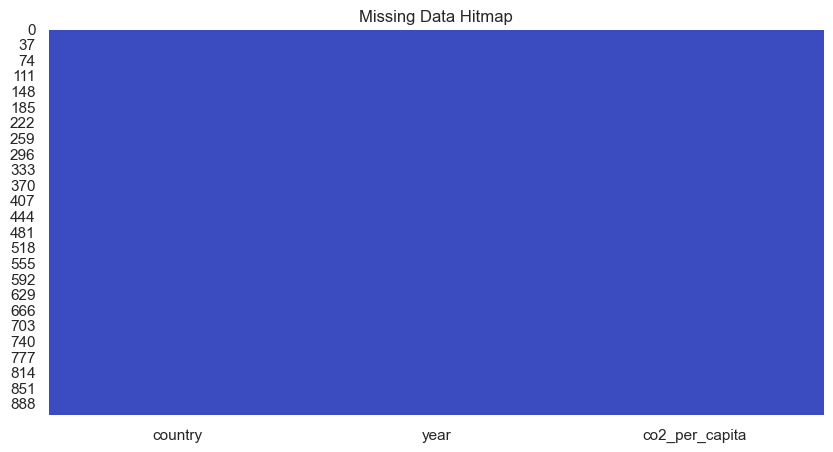

In [5]:
sns.heatmap(df.isna(), cbar=False, cmap='coolwarm')
plt.title("Missing Data Hitmap")
plt.show()

All entries in the dataset are present - there are no missing or null values to clean

### Data coverage per country
Since each ASEAN country’s dataset begins at a different year, we evaluate the temporal coverage of available data.
This allows us to understand which countries have long-term historical records versus those with more recent observations.


In [6]:
coverage = df.groupby("country")["year"].agg(["min", "max", "count"]).reset_index()
coverage.columns = ["country", "start_year", "end_year", "num_records"]
coverage


,country,start_year,end_year,num_records
0,Cambodia,1955,2023,69
1,Indonesia,1889,2023,135
2,Laos,1955,2023,69
3,Malaysia,1890,2023,133
4,Myanmar,1928,2023,96
5,Philippines,1907,2023,114
6,Singapore,1950,2023,74
7,Thailand,1931,2023,90
8,Vietnam,1892,2023,132


The bar chart provides a quick visual of how many data points (years) are available per country, which is useful for later modeling and time-series analysis.

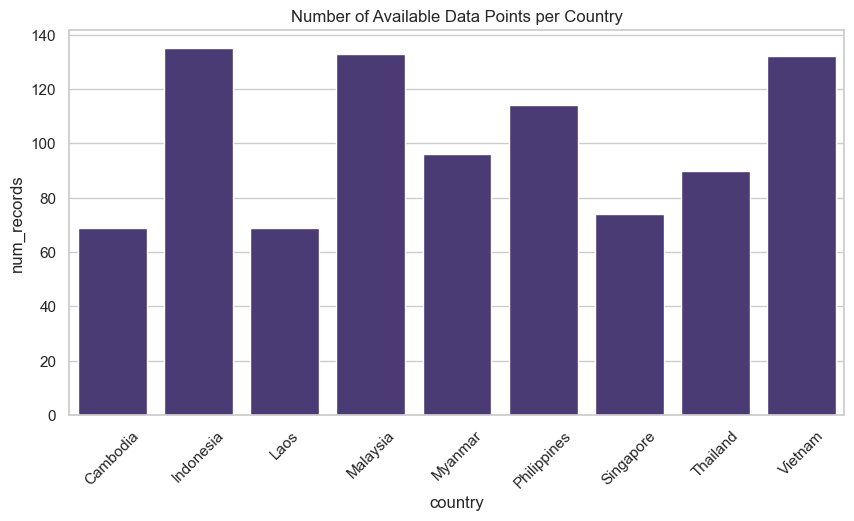

In [7]:
sns.barplot(data=coverage, x="country", y="num_records")
plt.title("Number of Available Data Points per Country")
plt.xticks(rotation=45)
plt.show()


### CO₂ Emission per Capita Trends Across ASEAN (Historical Perspective)


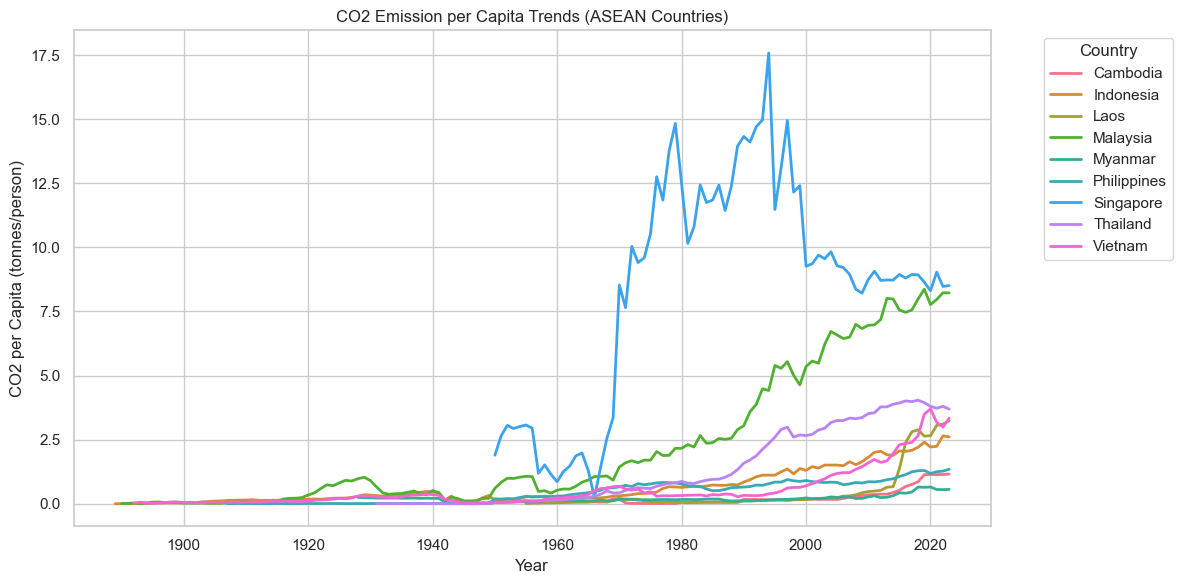

In [10]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=df,
    x="year", y="co2_per_capita",
    hue="country",
    linewidth=2,       
    marker=None       
)
plt.title("CO2 Emission per Capita Trends (ASEAN Countries)")
plt.ylabel("CO2 per Capita (tonnes/person)")
plt.xlabel("Year")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


Singapore maintains the highest CO₂ emission per capita throughout the timeline.
This reflects its long-standing role as a refining and petrochemical hub with limited renewable resources and high energy demand per person.
Despite its small size, Singapore’s advanced industrial base and energy-intensive economic activities amplify its per capita emissions.

Malaysia displays a steady increase in CO₂ emissions, particularly during periods of rapid industrialization and expansion of its oil and gas sector.
In recent years, the curve tends to stabilize, suggesting gradual progress toward energy diversification and efficiency improvements.

Countries like Indonesia, Vietnam, and Thailand exhibit a moderate upward trend, driven by population growth, urbanization, and industrial development. However, their per capita figures remain lower than Singapore and Malaysia due to larger populations diluting total emissions.

Nations such as Cambodia, Laos, and Myanmar show low but slightly increasing emissions, consistent with their later stages of industrial and energy infrastructure development.

Across the timeline, a few broader observations emerge:
- Upward trends generally align with industrial expansion and economic modernization phases.
- Flattening or slight declines in recent years for some countries (notably Singapore and Malaysia) may indicate early energy transition measures such as fuel switching, improved efficiency, or policy-driven carbon management.
- The widening gap between countries suggests diverse energy pathways and uneven transition readiness within ASEAN.

### Comparative View for the Most Recent Year


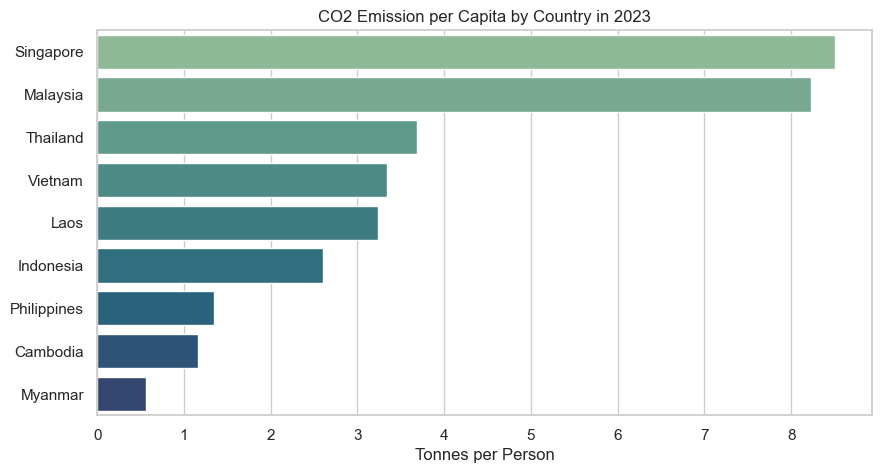

In [11]:
latest_year = df["year"].max()
df_latest = df[df["year"] == latest_year]

sns.barplot(data=df_latest.sort_values("co2_per_capita", ascending=False),
            x="co2_per_capita", y="country", palette="crest")

plt.title(f"CO2 Emission per Capita by Country in {latest_year}")
plt.xlabel("Tonnes per Person")
plt.ylabel("")
plt.show()


The chart shows that Singapore and Malaysia exhibit the highest CO₂ emissions per capita among ASEAN nations. Singapore, in particular, is a major global oil trading and refining hub, processing fuel not just for domestic use but for international markets. Malaysia also maintains a strong petroleum and natural gas industry, alongside heavy industrial activities that elevate per capita energy consumption.

When calculating per capita emissions, smaller countries with advanced economies often appear higher because emissions are divided by a relatively small population base. Having high CO₂ emissions per capita does not necessarily mean poor air quality. Singapore and Malaysia both maintain strong environmental regulations and advanced air quality management systems.

In summary, CO₂ per capita reflects energy use and economic structure, not the immediate quality of breathable air. This distinction underscores the need for integrated sustainability strategies that address both carbon reduction and urban air health.

### Trend Analysis and Annual Change


In [12]:
# Calculate average growth in emissions per country
trend = (
    df.groupby("country")
      .apply(lambda x: (x["co2_per_capita"].iloc[-1] - x["co2_per_capita"].iloc[0]) / len(x))
      .reset_index(name="avg_annual_change")
)

trend.sort_values("avg_annual_change", ascending=False)


,country,avg_annual_change
6,Singapore,0.089447
3,Malaysia,0.061786
2,Laos,0.046688
7,Thailand,0.040945
8,Vietnam,0.025125
1,Indonesia,0.019315
0,Cambodia,0.016480
5,Philippines,0.011793
4,Myanmar,0.003275


This quantitative measure shows whether emissions have been accelerating or decelerating on a per-person basis.
- A positive average change means emissions are still increasing year over year.
- A negative or near-zero value suggests stabilization or gradual reduction.

### Distribution of CO₂ Emission per Capita (All ASEAN Countries)

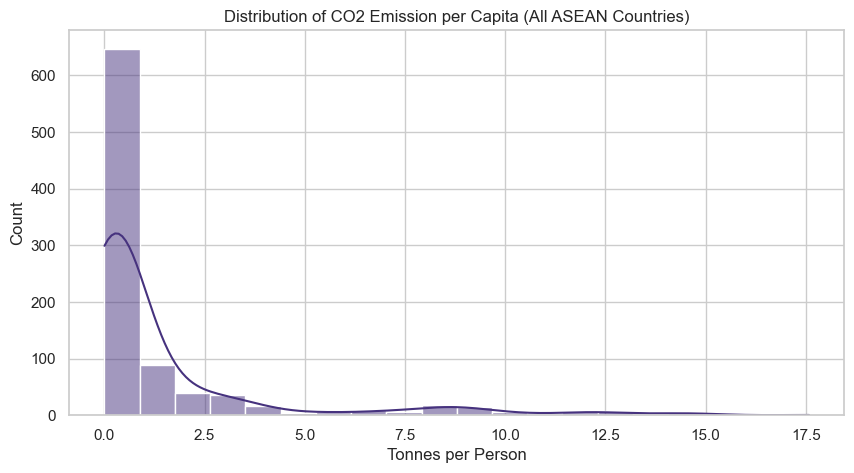

In [13]:
sns.histplot(df["co2_per_capita"], bins=20, kde=True)
plt.title("Distribution of CO2 Emission per Capita (All ASEAN Countries)")
plt.xlabel("Tonnes per Person")
plt.show()


The chart shows a right-skewed distribution, meaning most ASEAN countries have low CO₂ emissions per capita, while only a few have much higher values.
The majority of data points are groupped at the lower end (below around 3 tonnes per person). The longer tail to the right represents country with the highest CO₂ emission per capita such as Singapore and Malaysia, which have more advanced economies and energy-intenisve industries. Because their popullations are smaller, their emission per person appear higher even if total emissions are not the largest in the region.

Statistically, the data forms a non-uniform, long-tailed distribution, showing big differences in carbon intensity between countries.
This means that average emission values don’t tell the full story - regional averages can hide large gaps between high and low emitters.



### Correlation Between Year and CO₂ per Capita (Temporal Trend Strength)

In [14]:
# Correlation between year and CO₂ per capita per country (temporal trend strength)
corrs = df.groupby("country")[["year", "co2_per_capita"]].corr().iloc[0::2,-1].reset_index()
corrs.columns = ["country", "_", "corr_year_co2"]
corrs = corrs[["country", "corr_year_co2"]]
corrs.sort_values("corr_year_co2", ascending=False)


,country,corr_year_co2
5,Philippines,0.948206
7,Thailand,0.934306
3,Malaysia,0.869792
1,Indonesia,0.853304
0,Cambodia,0.750245
8,Vietnam,0.712317
2,Laos,0.664276
4,Myanmar,0.587089
6,Singapore,0.550249


Key observations:
- The Philippines and Thailand display the highest positive correlations. This suggests a steady and continuous increase in CO₂ emissions per capita over time. Both countries have experienced rapid urbanization, industrial growth, and increasing energy consumption in recent decades. 
- Malaysia (0.87) and Indonesia (0.85) also show high positive correlations, reflecting consistent industrial and population-driven growth.
Their emissions rise more gradually but remain clearly upward. 
- Cambodia, Vietnam, Laos, and Myanmar  (ranging from 0.58 to 0.75) indicate moderate, uneven growth patterns.
They are still developing their industrial and energy sectors, so emission increases are less steep compared to larger ASEAN economies.
- Singapore has the lowest correlation (0.55) despite being one of the highest emitters per capita. This shows that its emissions have stabilized in recent years due to strong environmental policies, energy efficiency measures, and a shift toward cleaner technologies.

Across ASEAN, all countries show positive correlations, meaning CO₂ emissions per capita continue to grow overall.
However, the variation in correlation strength highlights that each country is at a different phase of its energy and industrial development.
Singapore’s relatively weaker correlation demonstrates that economic advancement doesn’t always mean rising emissions, especially when supported by sustainable policy and clean energy adoption.